# **Image Classification Model**

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

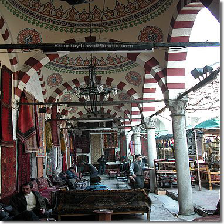

In [ ]:
coffeehouse_image_id = os.listdir('/content/drive/MyDrive/pictures_for_training/coffeehouse')[0]
coffeehouse_path = os.path.join('/content/drive/MyDrive/pictures_for_training/coffeehouse',coffeehouse_image_id)
coffeehouse_image = load_image(coffeehouse_path)

tf.keras.preprocessing.image.load_img(coffeehouse_path, target_size=(224,224))

In [ ]:
model.predict(coffeehouse_image)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
coffeehouse_image = load_image(coffeehouse_path)
model.predict(coffeehouse_image).shape

1/1 [==============================] - 1s 506ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/pictures_for_training', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/pictures_for_training',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 57 images belonging to 4 classes.
Found 6 images belonging to 4 classes.


In [ ]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=4,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/4
1/1 [==============================] - 7s 7s/step - loss: 2.2787
Epoch 2/4
1/1 [==============================] - 3s 3s/step - loss: 2.0458
Epoch 3/4
1/1 [==============================] - 3s 3s/step - loss: 1.6574
Epoch 4/4
1/1 [==============================] - 3s 3s/step - loss: 1.5855


In [ ]:
random_coffeehouse = random.choice(os.listdir('/content/drive/MyDrive/pictures_for_training/coffeehouse'))
coffeehouse_path = os.path.join('/content/drive/MyDrive/pictures_for_training/coffeehouse',random_coffeehouse)
coffeehouse = load_image(coffeehouse_path)

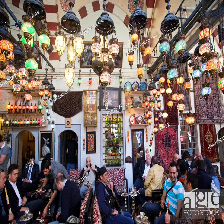

In [ ]:
tf.keras.preprocessing.image.load_img(coffeehouse_path, target_size=(224,224))

In [ ]:
print(f'''coffeehouse:{np.round(model.predict(coffeehouse),2)}''')

1/1 [==============================] - 1s 519ms/step
coffeehouse:[[0.03 0.04 0.81 0.13]]


In [ ]:
test_path = '/content/drive/MyDrive/test_image/01.jpeg'
test = load_image(test_path)

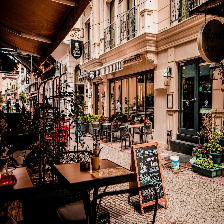

In [ ]:
tf.keras.preprocessing.image.load_img(test_path, target_size=(224,224))

In [ ]:
print(f'''test:{np.round(model.predict(test),4)}''')

1/1 [==============================] - 0s 72ms/step
test:[[0.2543 0.1453 0.368  0.2324]]


# **Score Mode**

In [ ]:
!pip install --upgrade moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 388 kB 14.1 MB/s 
     |████████████████████████████████| 26.9 MB 1.3 MB/s 
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110742 sha256=07838f1f942bccf624da125967c4ea5fe7f1873ddc50c131230eba645573e288
  Stored in directory: /root/.cache/pip/wheels/e4/a4/db/0368d3a04033da662e13926594b3a8cf1aa4ffeefe570cfac1
Successfully built moviepy
  Attempting uninstall: moviepy
    Found existing installation: moviepy 0.2.3.5
    Uninstalling moviepy-0.2.3.5:
      Successfully uninstalled moviepy-0.2.3.5


In [ ]:
! git clone https://github.com/kenshohara/video-classification-3d-cnn-pytorch.git

Cloning into 'video-classification-3d-cnn-pytorch'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 158.63 KiB | 8.81 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [ ]:
%cd video-classification-3d-cnn-pytorch/
!pwd

/content/video-classification-3d-cnn-pytorch
/content/video-classification-3d-cnn-pytorch


In [ ]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [ ]:
videos = os.listdir('/content/drive/MyDrive/FilmClips/Videos')

with open('input', 'w') as inputfile:
  for v in videos:
    if v.split('.')[-1] == 'mp4':
      print(v)
      inputfile.write(v+'\n')

Existing.mp4


In [ ]:
! python main.py --input input --video_root /content/drive/MyDrive/FilmClips/Videos --output /content/drive/MyDrive/FilmClips/Output_json/output.json --model /content/drive/MyDrive/RC11-SkillsClass2022/r220/resnet-34-kinetics-cpu.pth --model_depth 34 --no_cuda --mode score --resnet_shortcut A

In [ ]:
! python generate_result_video/generate_result_video.py /content/drive/MyDrive/FilmClips/Output_json/output.json /content/drive/MyDrive/FilmClips/Videos /content/drive/MyDrive/FilmClips/Videos_pred class_names_list 5

In [ ]:
file = open('/content/drive/MyDrive/FilmClips/Output_json/output.json')
segments = json.load(file)

In [ ]:
def Sc(seg,cli):
  classNames = []
  with open('class_names_list', 'r') as class_names_list:
    index = 0
    for c in class_names_list:
      classNames.append({'index':index, 'name':c, 'score':0})
      index += 1
      
  for i in range(len(segments[seg]['clips'][cli]['scores'])):
    score = segments[seg]['clips'][cli]['scores'][i]
    classNames[i]['score'] = score
  classNames.sort(key = lambda x : x['score'], reverse = True)

  return classNames[0]

In [ ]:
for i in range(1):  #Number of segments
  for j in range(5):  #Number of clips
    print(Sc(i,j))

{'index': 134, 'name': 'front raises\n', 'score': 7.040491104125977}
{'index': 316, 'name': 'smoking\n', 'score': 5.951438903808594}
{'index': 352, 'name': 'tasting beer\n', 'score': 5.105318069458008}
{'index': 352, 'name': 'tasting beer\n', 'score': 6.478599548339844}
{'index': 352, 'name': 'tasting beer\n', 'score': 4.655983924865723}


***Long Period***

In [ ]:
videos_fps = []
root_path = "/content/drive/MyDrive/FilmClips/Videos/"
for v in videos:
  videos_fps.append(VideoFileClip(root_path + v).fps)

print(videos_fps)

[21.17]


In [ ]:
root_path = "/content/drive/MyDrive/FilmClips/Videos/"
longPeriods = []

for f in segments:
  # 用于存储f，即，单个视频中的合并后的各个label以及所对应的秒数
  label_periods = []
  frame_length = 1 / VideoFileClip(root_path + f['video']).fps

  currentLabel = None
  ts = 0
  te = 0
  # 按照label将每一小段的clip进行合并，即，记录每一个被合并后的clip的秒数以及相应的标签名字到label_peirods上面
  for c in f['clips']:
    label = c['label']
    s = c['segment'][0]
    e = c['segment'][1]
    if label == currentLabel:
      te = e 
    else:
      label_periods.append([(ts,te),currentLabel])

      ts = s
      te = e 
      currentLabel = label


  for lp in label_periods:
    if lp[0][1]-lp[0][0] > (2/frame_length):
      lp.append(f['video'])
      longPeriods.append(lp)

longPeriods

[[(33, 96), 'tasting beer', 'Existing.mp4']]

In [ ]:
clips = []
for lp in longPeriods:
  subclip = VideoFileClip(root_path + lp[2]).subclip(lp[0][0]*frame_length,lp[0][1]*frame_length)
  clips.append([subclip,lp[1]+'_'+str(int(lp[0][0]*frame_length))])
clips

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x7f59301e3af0>,
  'tasting beer_1']]

In [ ]:
folderPath = '/content/drive/MyDrive/FilmClips/VideosOut/'
for c in clips:
  c[0].write_videofile(folderPath + c[1] + '.mp4', audio_codec='aac')

Moviepy - Building video /content/drive/MyDrive/FilmClips/VideosOut/tasting beer_1.mp4.
MoviePy - Writing audio in tasting beer_1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/FilmClips/VideosOut/tasting beer_1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FilmClips/VideosOut/tasting beer_1.mp4


# **Feature Mode**

***Preparation***

In [ ]:
import json
import os
from moviepy.editor import *
from moviepy import *
import numpy as np

In [ ]:
def BRS(x,y):
  bestRangeStart = 0
  bestRangeScore = 100000000
  for i in range(len(x)-len(y)):
    distance = 0
    for j in range(len(y)):
      d = np.linalg.norm(MyVideos[i+j]-MyFeatures[j])
      distance += d
    if distance < bestRangeScore:
      bestRangeScore = distance
      bestRangeStart = i

  return bestRangeStart

***Input & Train***

In [ ]:
inputFeature = os.listdir('/content/drive/MyDrive/FilmClips/VideosToProcess')

with open('input', 'w') as inputfile:
  for v in inputFeature:
    if v.split('.')[-1] == 'mp4':
      inputfile.write(v+'\n')

In [ ]:
!python main.py --input input --video_root /content/drive/MyDrive/FilmClips/VideosToProcess --output /content/drive/MyDrive/FilmClips/output.json --model /content/drive/MyDrive/RC11-SkillsClass2022/r220/resnet-34-kinetics-cpu.pth --model_depth 34 --mode feature --resnet_shortcut A --no_cuda

loading model /content/drive/MyDrive/RC11-SkillsClass2022/r220/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/FilmClips/VideosToProcess/video1.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --en

In [ ]:
videos_root = '/content/drive/MyDrive/FilmClips/OtherVideos3'  #待剪辑step2仍要改root

In [ ]:
inputOthervideos = os.listdir(videos_root)

with open('input_othervideos', 'w') as inputfile2:
  for v in inputOthervideos:
    if v.split('.')[-1] == 'mp4':
      inputfile2.write(v+'\n')

In [ ]:
!python main.py --input input_othervideos --video_root /content/drive/MyDrive/FilmClips/OtherVideos3 --output /content/drive/MyDrive/FilmClips/othervideos_json/output3.json --model /content/drive/MyDrive/RC11-SkillsClass2022/r220/resnet-34-kinetics-cpu.pth --model_depth 34 --mode feature --resnet_shortcut A --no_cuda

loading model /content/drive/MyDrive/RC11-SkillsClass2022/r220/resnet-34-kinetics-cpu.pth
/content/drive/MyDrive/FilmClips/OtherVideos3/party02.mp4
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enab

***Clip***

In [ ]:
def clipbyFeature(input_root,output_root):

  file1 = open(input_root)
  featureSegments = json.load(file1)

  file2 = open(output_root)
  videoSegments = json.load(file2)

  videoList = os.listdir(videos_root)

  MyFeatures = []
  for s in featureSegments[0]['clips']:
    MyFeatures.append(np.array(s['features']))  

  for i in range(len(videoList)):
    MyVideos = []
    for s in videoSegments[i]['clips']:
      MyVideos.append(np.array(s['features']))  

    bestRangeStart = BRS(MyVideos,MyFeatures)

    LongVideo = VideoFileClip(videos_root + '/' + videoList[i]) 
    tsfps = LongVideo.fps
    tsFrameLength = 1/tsfps

    nrFrames = len(MyFeatures)*16
    startFrame = bestRangeStart*16

    startTime = startFrame*tsFrameLength
    endTime = startTime+nrFrames*tsFrameLength

    LongMatchedVideo = LongVideo.subclip(startTime,endTime)

    LongMatchedVideo.write_videofile('/content/drive/MyDrive/FilmClips/VideosOut/LongVideoClip' + videoList[i] + '.mp4', audio_codec='aac')

In [ ]:
input_root = '/content/drive/MyDrive/FilmClips/output.json'
output_root = '/content/drive/MyDrive/FilmClips/othervideos_json/output3.json'

clipbyFeature(input_root,output_root)

Moviepy - Building video /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty02.mp4.mp4.
MoviePy - Writing audio in LongVideoClipparty02.mp4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty02.mp4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty02.mp4.mp4
Moviepy - Building video /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty01.mp4.mp4.
MoviePy - Writing audio in LongVideoClipparty01.mp4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty01.mp4.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty01.mp4.mp4


# **Get Frame**

In [ ]:
LongMatchedVideo = VideoFileClip('/content/drive/MyDrive/FilmClips/VideosOut/LongVideoClipparty01.mp4.mp4')

In [ ]:
from PIL import Image

In [ ]:
LongMatchedVideo.duration

5.27

In [ ]:
frame = LongMatchedVideo.get_frame(5)

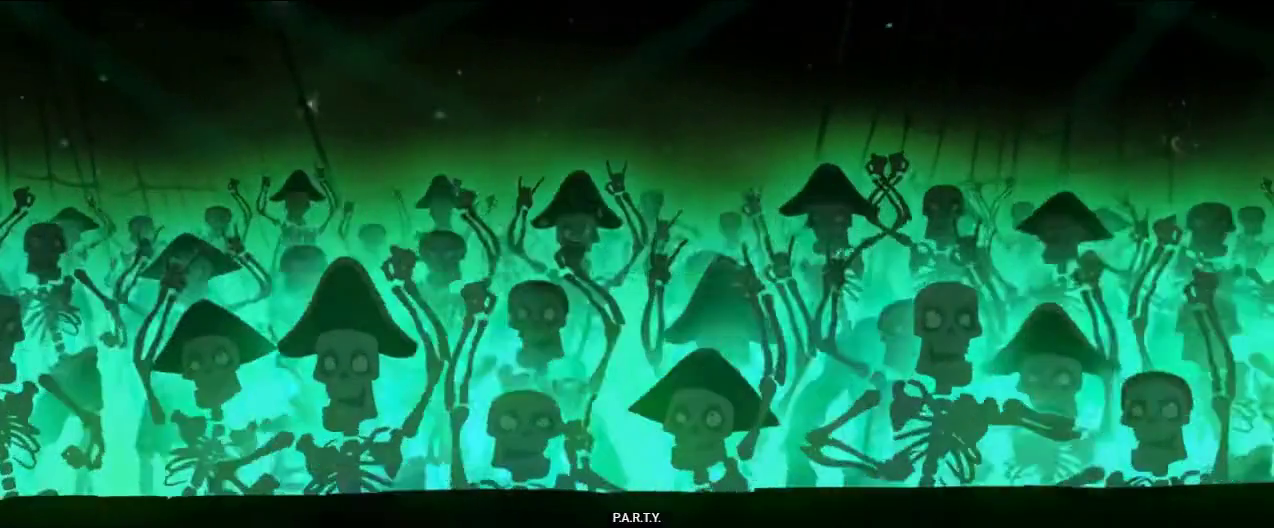

In [ ]:
Image.fromarray(frame,'RGB')

# **Similar Scene in Film**

In [ ]:
featureClip = VideoFileClip('/content/drive/MyDrive/FilmClips/VideosToProcess/video1.mp4')
featureClip.duration

5.49

In [ ]:
featureFrame = featureClip.get_frame(1)

In [ ]:
for i in range(int(LongMatchedVideo.duration * LongMatchedVideo.fps)):
  videoFrames = LongMatchedVideo.get_frame(i / LongMatchedVideo.fps)

In [ ]:
# Homework 7

# Sorry, I don't know what to do next. :(

# **Scrape Films**

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import re

In [ ]:
# specify the URL of the archive here
archive_url = "https://ubu.com/film/"

In [ ]:
def get_sites(url):
  sites = []
  html_page = urllib.request.urlopen(url)
  soup = BeautifulSoup(html_page, "html.parser")
  for link in soup.findAll('a'):
    site = link.get('href')
    # the main page is not an artist
    index = re.search("index.html$", site)
    root = re.search("^[.][.]/", site)
    if not index and not root:
      sites.append(site)
  return sites

In [ ]:
def get_video_links(url):
  #create response object
  r = requests.get(url)
  # move up 2 folders in the URL
  url = url[:url.rfind('/')]
  url = url[:url.rfind('/')]
  #create beautiful-soup object
  soup = BeautifulSoup(r.content,'html5lib')
  #find all links on web-page
  links = soup.findAll('a')
  #filter the link ending with .mp4
  video_links = [url + link['href'][2:] for link in links if link['href'].endswith('mp4')]
 
  return video_links

In [ ]:
def download_video_series(video_links, directory):
  # iterate through all links in video_links
  # and download them one by one
  for link in video_links:
    # obtain filename by splitting url and getting last string
    file_name = link.split('/')[-1]
    print ("Downloading file:%s"%file_name)

    try:
      #create response object
      r = requests.get(link, stream = True)

      #download started
      with open(os.path.join(directory, file_name), 'wb') as f:
        for chunk in r.iter_content(chunk_size = 1024*1024):
          if chunk:
            f.write(chunk)

      print ("%s downloaded!\n"%file_name)
    except:
      # ConnectionRefusedError or URLError 
      print("Failed to download file due to an error.")

In [ ]:
artist_sites = get_sites(archive_url + "index.html")

In [ ]:
for artist_site in artist_sites[-1:]:
  print(archive_url + artist_site)
  film_sites = get_sites(archive_url + artist_site)
  for film_site in film_sites:
    #getting all video links
    video_links = get_video_links(archive_url + film_site)

    #download all videos
    download_video_series(video_links, '/content/drive/MyDrive/RC11-SkillsClass2022/ScrapedVideos')

https://ubu.com/film/zulueta.html
Zulueta-Ivan_Leo-es-pardo_1976.mp4 downloaded!

